# 🍔 Fast Food Sales Analysis Project

**Welcome to the Fast Food Sales Performance Analysis!**

In this project, we dive into a transactional dataset of a fast-food chain to uncover sales trends, product performance, and revenue insights. Using **Python**'s powerful libraries, we transform raw transaction logs into meaningful business intelligence.

### 🎯 Project Goals:
1.  **Data Cleaning:** Renaming messy column headers and fixing data types for accurate analysis.
2.  **Product Insights:** Identifying the *best-selling items* and the *highest revenue generators*.
3.  **Visual Analytics:** Creating clear bar charts (`countplot`) to visualize transaction volumes.
4.  **Advanced Aggregation:** Using **Pivot Tables** to summarize Quantity and Revenue metrics simultaneously.

### 🛠️ Tools Used:
* **Pandas:** For data manipulation and pivot tables.
* **Seaborn & Matplotlib:** For plotting sales trends.



# 1. Loading Libraries
We import the necessary libraries for data manipulation and visualization (`pandas`, `matplotlib`, `seaborn`).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset


In [2]:

df=pd.read_excel("fastfood_sales.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,NaN,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,NaN,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
3,NaN,10454,2022-11-07 00:00:00,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
4,NaN,10455,2022-11-08 00:00:00,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...,...
250,NaN,10709,2022-12-28 00:00:00,Sides & Other,4.99,200.400802,Drive-thru,Gift Card,Walter Muller,Berlin
251,NaN,10710,2022-12-29 00:00:00,Burgers,12.99,754.426482,Drive-thru,Gift Card,Walter Muller,Berlin
252,NaN,10711,2022-12-29 00:00:00,Chicken Sandwiches,9.95,281.407035,Drive-thru,Gift Card,Walter Muller,Berlin
253,NaN,10712,2022-12-29 00:00:00,Fries,3.49,630.372493,Drive-thru,Gift Card,Walter Muller,Berlin


# 3. Data Cleaning: Fixing Column Headers
The raw dataset contains unnamed or unclear columns. We remove unnecessary rows/columns and set the correct headers for better readability.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  255 non-null    object 
 2   Unnamed: 2  255 non-null    object 
 3   Unnamed: 3  255 non-null    object 
 4   Unnamed: 4  255 non-null    object 
 5   Unnamed: 5  255 non-null    object 
 6   Unnamed: 6  255 non-null    object 
 7   Unnamed: 7  255 non-null    object 
 8   Unnamed: 8  255 non-null    object 
 9   Unnamed: 9  255 non-null    object 
dtypes: float64(1), object(9)
memory usage: 20.1+ KB


In [4]:
df.drop(columns = "Unnamed: 0" , inplace =True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  255 non-null    object
 1   Unnamed: 2  255 non-null    object
 2   Unnamed: 3  255 non-null    object
 3   Unnamed: 4  255 non-null    object
 4   Unnamed: 5  255 non-null    object
 5   Unnamed: 6  255 non-null    object
 6   Unnamed: 7  255 non-null    object
 7   Unnamed: 8  255 non-null    object
 8   Unnamed: 9  255 non-null    object
dtypes: object(9)
memory usage: 18.1+ KB


In [6]:
df.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07 00:00:00,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08 00:00:00,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin


In [7]:
df.loc[0]

Unnamed: 1          Order ID
Unnamed: 2              Date
Unnamed: 3           Product
Unnamed: 4             Price
Unnamed: 5          Quantity
Unnamed: 6     Purchase Type
Unnamed: 7    Payment Method
Unnamed: 8           Manager
Unnamed: 9              City
Name: 0, dtype: object

In [8]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [9]:
df.columns =df.loc[0]

In [10]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07 00:00:00,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08 00:00:00,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin


In [11]:
df.drop(0,inplace=True)

In [12]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07 00:00:00,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08 00:00:00,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
5,10456,2022-11-08 00:00:00,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


# 4. Data Inspection & Missing Values
Checking the data types and looking for any missing (null) values in the clean dataframe.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        254 non-null    object
 1   Date            254 non-null    object
 2   Product         254 non-null    object
 3   Price           254 non-null    object
 4   Quantity        254 non-null    object
 5   Purchase Type   254 non-null    object
 6   Payment Method  254 non-null    object
 7   Manager         254 non-null    object
 8   City            254 non-null    object
dtypes: object(9)
memory usage: 18.0+ KB


# 5. Feature Engineering: Cleaning Text Data
Removing extra spaces and inconsistencies from categorical columns (like 'Manager') to ensure accurate grouping later.

In [14]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid


In [15]:
df.Manager

1        Tom      Jackson
2             Pablo Perez
3           Joao    Silva
4           Walter Muller
5           Walter Muller
              ...        
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
254         Walter Muller
Name: Manager, Length: 254, dtype: object

In [16]:
df.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [17]:
df.Manager.nunique()

14

In [18]:
#strip() removes the beginning and end elements
#str.replace() reduces multiple adjacent sections within its content to a single space.
#strip() baş ve sondaki boşlukları siler
#str.replace() metnin içindeki yan yana duran çoklu boşlukları tek boşluğa indirir.
df["Manager"] = df["Manager"].str.strip().str.replace(r'\s+',' ',regex =True)
df["Manager"] 

1        Tom Jackson
2        Pablo Perez
3         Joao Silva
4      Walter Muller
5      Walter Muller
           ...      
250    Walter Muller
251    Walter Muller
252    Walter Muller
253    Walter Muller
254    Walter Muller
Name: Manager, Length: 254, dtype: object

In [19]:
df.Manager.unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [20]:
df.Manager.nunique()

5

In [21]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07 00:00:00,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08 00:00:00,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
5,10456,2022-11-08 00:00:00,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [22]:
df.describe()

C:\Users\deniz\AppData\Local\Temp\ipykernel_11148\3627053830.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df.describe()


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
count,254,254,254,254.00,254.000000,254,254,254,254
unique,254,53,5,7.00,29.000000,3,3,5,5
top,10452,2022-11-09 00:00:00,Chicken Sandwiches,12.99,200.400802,Online,Credit Card,Tom Jackson,London
freq,1,5,52,52.00,49.000000,107,120,75,75


In [23]:
df.duplicated().sum() #there is no duplicate records

np.int64(0)

In [24]:
df["Order ID"].duplicated().sum()

np.int64(0)

# 6. Data Type Conversion
Converting numeric columns (`Price`, `Quantity`) to float/int and the `Date` column to datetime objects for accurate calculations.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        254 non-null    object
 1   Date            254 non-null    object
 2   Product         254 non-null    object
 3   Price           254 non-null    object
 4   Quantity        254 non-null    object
 5   Purchase Type   254 non-null    object
 6   Payment Method  254 non-null    object
 7   Manager         254 non-null    object
 8   City            254 non-null    object
dtypes: object(9)
memory usage: 18.0+ KB


In [26]:
df.Quantity =df.Quantity.astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    object 
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    object 
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(1), object(8)
memory usage: 18.0+ KB


In [28]:
df.Quantity =df.Quantity.round()

In [29]:
df.Quantity

1      573.0
2      746.0
3      200.0
4      570.0
5      201.0
       ...  
250    200.0
251    754.0
252    281.0
253    630.0
254    678.0
Name: Quantity, Length: 254, dtype: float64

In [30]:
df.Quantity =df.Quantity.astype(int)

In [31]:
df.Quantity

1      573
2      746
3      200
4      570
5      201
      ... 
250    200
251    754
252    281
253    630
254    678
Name: Quantity, Length: 254, dtype: int64

In [32]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07 00:00:00,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07 00:00:00,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07 00:00:00,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08 00:00:00,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
5,10456,2022-11-08 00:00:00,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [33]:
df["Order ID"] =df["Order ID"].astype(int)
df["Price"] =df["Price"].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    int64  
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 18.0+ KB


In [35]:
df["Date"] =pd.to_datetime(df.Date)

In [36]:
df.Date.dtype

dtype('<M8[ns]')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


# 7. Analysis: Preferred Payment Methods
Visualizing the distribution of payment methods used by customers to understand payment preferences.


In [38]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
3,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
4,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
5,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [39]:
df["Payment Method"].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [40]:
df["Payment Method"].nunique()

3

In [41]:
df["Payment Method"].value_counts(normalize=True)*100

Payment Method
Credit Card    47.244094
Cash           29.921260
Gift Card      22.834646
Name: proportion, dtype: float64

<Axes: xlabel='Payment Method'>

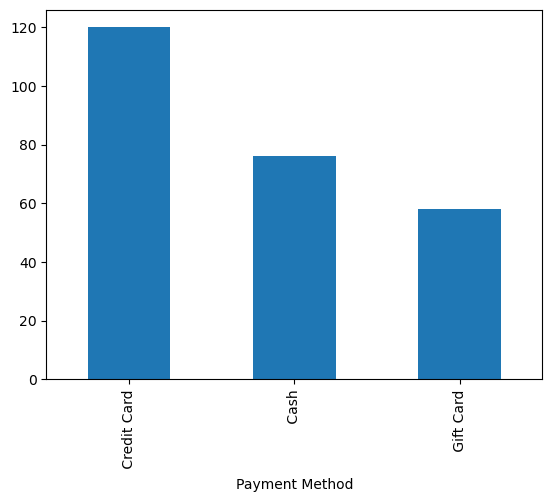

In [42]:
df["Payment Method"].value_counts().plot(kind="bar")

# 8. Top Selling Products (By Quantity)
Identifying which items are ordered the most frequently using a bar chart.

In [43]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid


In [44]:
most_quantity=df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
most_quantity

Product
Beverages             34988
Fries                 32023
Burgers               29018
Chicken Sandwiches    11133
Sides & Other          9800
Name: Quantity, dtype: int64

In [45]:
most_quantity.head(1)

Product
Beverages    34988
Name: Quantity, dtype: int64

In [46]:
type(most_quantity)

pandas.core.series.Series

In [47]:
most_quantity =most_quantity.reset_index()

In [48]:
type(most_quantity)

pandas.core.frame.DataFrame

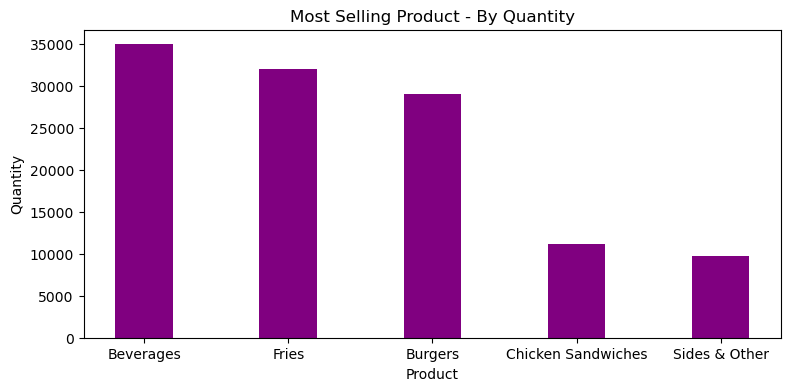

In [49]:
plt.figure(figsize=(9,4))
plt.bar(most_quantity["Product"],most_quantity["Quantity"] ,color ="purple",width =0.4)
plt.title("Most Selling Product - By Quantity")
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

# 9. Revenue Analysis
Calculating the total revenue generated by each product to see which items are the most profitable for the business.

In [50]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid


In [51]:
df["Revenue"]= df["Price"]* df["Quantity"]

In [52]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70


In [53]:
most_revenue=df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
most_revenue

Product
Burgers               376943.82
Fries                 125626.57
Chicken Sandwiches    114612.45
Beverages             103214.60
Sides & Other          48902.00
Name: Revenue, dtype: float64

In [54]:
most_revenue=most_revenue.reset_index()
most_revenue

,Product,Revenue
0,Burgers,376943.82
1,Fries,125626.57
2,Chicken Sandwiches,114612.45
3,Beverages,103214.60
4,Sides & Other,48902.00


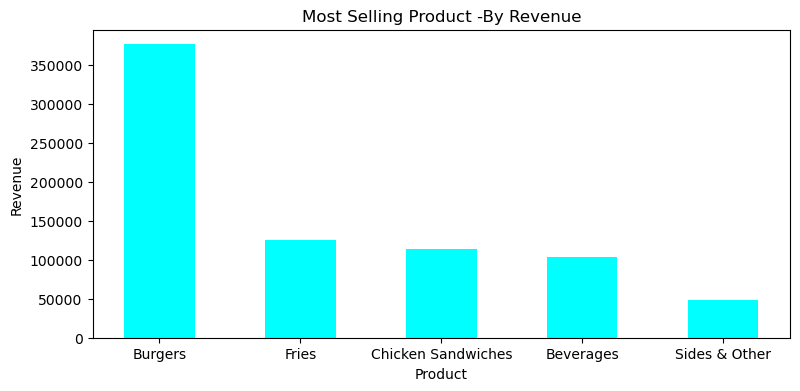

In [55]:
plt.figure(figsize=(9,4))
plt.bar(most_revenue["Product"],most_revenue["Revenue"],color="cyan",width=0.5)
plt.title("Most Selling Product -By Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

In [56]:
df.City.unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [57]:
df.City.nunique()

5

In [58]:
df.groupby("City")["Revenue"].sum().sort_values(ascending=False)

City
Lisbon    241635.49
London    211160.04
Madrid    136154.24
Berlin    100572.34
Paris      79777.33
Name: Revenue, dtype: float64

In [59]:
df.Manager.unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [60]:
df.Manager.nunique()

5

In [61]:
df.groupby("Manager")["Revenue"].sum().sort_values(ascending=False)

Manager
Joao Silva       241635.49
Tom Jackson      211160.04
Pablo Perez      136154.24
Walter Muller    100572.34
Remy Monet        79777.33
Name: Revenue, dtype: float64

In [62]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70


In [63]:
df.Date.dtype

dtype('<M8[ns]')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Revenue         254 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 20.0+ KB


<Axes: xlabel='Date'>

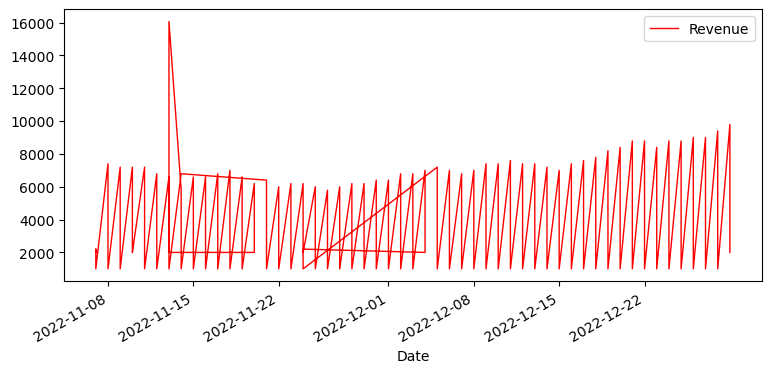

In [65]:
df.plot("Date","Revenue",color="red",linewidth=1,figsize=(9,4))

In [66]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70


In [67]:
df["Revenue"].mean()

np.float64(3028.737952755905)

In [68]:
df["Month"] = df["Date"].dt.month

In [69]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11


In [70]:
month11=df[df["Month"]==11]
month11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11
3,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
4,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,11
5,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
109,10568,2022-11-30,Beverages,2.95,678,Online,Credit Card,Tom Jackson,London,2000.10,11
110,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
128,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
129,10538,2022-11-24,Beverages,2.95,746,Drive-thru,Credit Card,Pablo Perez,Madrid,2200.70,11


In [71]:
month11.Revenue.mean()

np.float64(2938.1869026548666)

In [72]:
month12=df[df["Month"]==12]
month12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
111,10570,2022-12-01,Burgers,12.99,493,Online,Credit Card,Tom Jackson,London,6404.07,12
112,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
113,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
114,10573,2022-12-01,Beverages,2.95,678,Online,Credit Card,Remy Monet,Paris,2000.10,12
115,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
250,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
251,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
252,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
253,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [73]:
month12.Revenue.mean()

np.float64(3101.3072340425533)

In [74]:
df["Quantity"].std()

214.97943096363838

In [75]:
df["Quantity"].var()

46216.155737449764

In [76]:
df["Revenue"].std()

2419.9325462715055

In [77]:
df["Revenue"].var()

5856073.528504092

In [78]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11


In [79]:
month11=df[df["Month"]==11]
month11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
1,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
2,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11
3,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
4,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,11
5,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
109,10568,2022-11-30,Beverages,2.95,678,Online,Credit Card,Tom Jackson,London,2000.10,11
110,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
128,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
129,10538,2022-11-24,Beverages,2.95,746,Drive-thru,Credit Card,Pablo Perez,Madrid,2200.70,11


In [80]:
month11["Revenue"].sum()

np.float64(332015.11999999994)

In [81]:
month12=df[df["Month"]==12]
month12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
111,10570,2022-12-01,Burgers,12.99,493,Online,Credit Card,Tom Jackson,London,6404.07,12
112,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
113,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
114,10573,2022-12-01,Beverages,2.95,678,Online,Credit Card,Remy Monet,Paris,2000.10,12
115,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
250,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
251,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
252,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
253,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [82]:
month12["Revenue"].sum()

np.float64(437284.32)

# 10. Aggregated Summary by Product (Groupby)
Using `groupby()` to calculate the average **Quantity** and **Revenue** for each product simultaneously. This gives us a consolidated view of product performance without using a pivot table.

In [84]:

df.groupby("Product").agg({"Quantity": "mean", "Revenue": "mean"})

,Quantity,Revenue
Product,,
Beverages,699.760000,2064.292000
Burgers,558.038462,7248.919615
Chicken Sandwiches,214.096154,2204.085577
Fries,627.901961,2463.266078
Sides & Other,200.000000,998.000000
